In [172]:
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2, ncx2, multivariate_normal
from scipy.special import erf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import product
import ipdb
import pickle

# known tau results

# universal inference

In [141]:
def universal_inference_MVN(theta_norm_sq, d=10, n=10, mu=0, sigma=1, alpha=0.1):
    mean = np.repeat(mu,d)
    cov = sigma**2*np.eye(d)
    x_obs = multivariate_normal.rvs(mean=mean, cov=cov, size=n)
    theta = np.repeat(np.sqrt(theta_norm_sq / d), d)
    mle_0 = x_obs[int(n/2):].mean(axis=0)
    mle_1 = x_obs[:int(n/2)].mean(axis=0)
    num_0 = multivariate_normal.pdf(x=x_obs[:int(n/2)], mean=mle_0, cov=cov)
    num_1 = multivariate_normal.pdf(x=x_obs[int(n/2):], mean=mle_1, cov=cov)
    den_0 = multivariate_normal.pdf(x=x_obs[:int(n/2)], mean=theta, cov=cov)
    den_1 = multivariate_normal.pdf(x=x_obs[int(n/2):], mean=theta, cov=cov)
    T_0 = np.sum(np.log(num_0)) - np.sum(np.log(den_0))
    T_1 = np.sum(np.log(num_1)) - np.sum(np.log(den_1))
    S = np.log((np.exp(T_0) + np.exp(T_1)) / 2)
    reject = 0
    if S > np.log(1.0/alpha):
        reject = 1
    return reject

In [155]:
test = [universal_inference_MVN(theta_norm_sq=0.025, d=10, n=1000, mu=0, sigma=1, alpha=0.1) for i in range(1000)]
np.mean(test)

0.546

In [158]:
test = [universal_inference_MVN(theta_norm_sq=30, d=100, n=10, mu=0, sigma=1, alpha=0.1) for i in range(1000)]
np.mean(test)

0.977

In [161]:
# fine grid of ||theta||^2 alternatives to mu
grid_theta_norm_sq = np.linspace(0, 30, 151)

In [170]:
fine_theta_grid = np.array([np.repeat(np.sqrt(t / 10), 10) for t in grid_theta_norm_sq])
fine_theta_grid[10]

array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136,
       0.4472136, 0.4472136, 0.4472136, 0.4472136])

In [173]:
with open("UI_power_dict_2021-01-27-22-56.pkl", 'rb') as handle:
    UI_power_dict = pickle.load(handle)

Text(0, 0.5, 'Power')

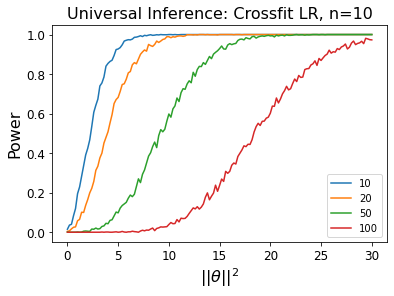

In [198]:
pd.DataFrame(UI_power_dict).plot(fontsize=12)
plt.title("Universal Inference: Crossfit LR, n=10", fontsize=16)
plt.xlabel("$||$" + r"$\theta$" + "$||^2$", fontsize=16)
plt.ylabel("Power", fontsize=16)

In [182]:
folder = "C_knowntau/"

with open(folder + "out_power_d10_LR_2021-01-27-23-40.pkl", 'rb') as handle:
    out_power_d10_LR = pickle.load(handle)
with open(folder + "out_power_d20_LR_2021-01-27-23-38.pkl", 'rb') as handle:
    out_power_d20_LR = pickle.load(handle)
with open(folder + "out_power_d50_LR_2021-01-28-00-29.pkl", 'rb') as handle:
    out_power_d50_LR = pickle.load(handle)
with open(folder + "out_power_d100_LR_2021-01-28-00-53.pkl", 'rb') as handle:
    out_power_d100_LR = pickle.load(handle)
    
with open(folder + "", 'rb') as handle:
    out_power_d10_BF = pickle.load(handle)
with open(folder + "", 'rb') as handle:
    out_power_d20_BF = pickle.load(handle)
with open(folder + "", 'rb') as handle:
    out_power_d50_BF = pickle.load(handle)
with open(folder + "", 'rb') as handle:
    out_power_d100_BF = pickle.load(handle)

In [186]:
LR_power_dict_C = {10: pd.DataFrame(out_power_d10_LR).mean(axis=1),
                   20: pd.DataFrame(out_power_d20_LR).mean(axis=1),
                   50: pd.DataFrame(out_power_d50_LR).mean(axis=1),
                   100: pd.DataFrame(out_power_d100_LR).mean(axis=1)
                  }

Text(0, 0.5, 'Power')

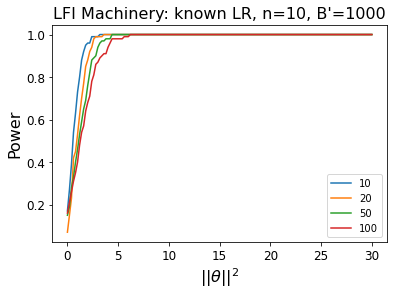

In [199]:
pd.DataFrame(LR_power_dict_C).plot(fontsize=12)
plt.title("LFI Machinery: known LR, n=10, B'=1000", fontsize=16)
plt.xlabel("$||$" + r"$\theta$" + "$||^2$", fontsize=16)
plt.ylabel("Power", fontsize=16)

In [200]:
BF_power_dict_C = {10: pd.DataFrame(out_power_d10_BF).mean(axis=1),
                   20: pd.DataFrame(out_power_d20_BF).mean(axis=1),
                   50: pd.DataFrame(out_power_d50_BF).mean(axis=1),
                   100: pd.DataFrame(out_power_d100_BF).mean(axis=1)
                  }

Text(0, 0.5, 'Power')

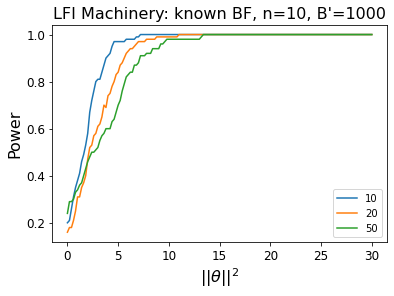

In [201]:
pd.DataFrame(BF_power_dict_C).plot(fontsize=12)
plt.title("LFI Machinery: known BF, n=10, B'=1000", fontsize=16)
plt.xlabel("$||$" + r"$\theta$" + "$||^2$", fontsize=16)
plt.ylabel("Power", fontsize=16)